# Radial Basis Functions

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
from sklearn.metrics import mean_squared_error
import tensorflow as tf

## Synthetic Data

In [255]:
scale = 40
x = np.linspace(-3,3,scale)
y = -x**2 + 5

x_dist = np.asarray([np.asarray([np.random.normal(i,0.1) for j in range(scale)]) for i in x])

y_dist = np.asarray([np.asarray([np.random.normal(i,1) for j in range(scale)]) for i in y])
y_flat = y_dist.flatten()
x_flat = x_dist.flatten()

data = np.array([x_flat, y_flat]).T

In [256]:
X = data[:,0].reshape(-1, 1)
y = data[:,1].reshape(-1, 1)

## Plot

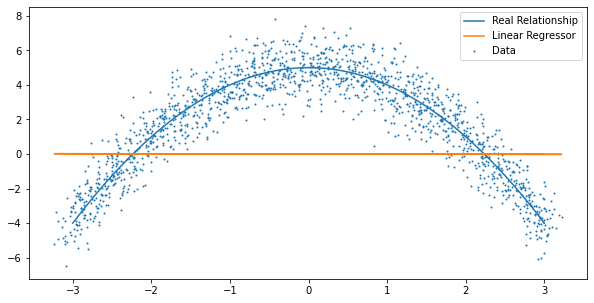

In [257]:
plt.figure(figsize = (10,5))
plt.scatter(data[:,0], data[:,1], s = 1, label = "Data")
plt.plot(X_test,y_test, label = "Real Relationship")
w = ((X.T@X)**-1)@X.T@y
plt.plot(X,w*X, label = "Linear Regressor")
plt.legend()

## RBF

In [258]:
from sklearn.model_selection import train_test_split


In [259]:
X_test = np.linspace(-3,3,1000)
y_test = -X_test**2 + 5

In [260]:
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma)) #u is the center of the basis function (the mean of the gaussian)

In [261]:
def improved_model(X_train, y_train, X_test, y_test, plot = False):
    M = 20

    kmeans = KMeans(M)
    kmeans.fit(X_train)
    C = kmeans.cluster_centers_
    
    #sigma average
    sigma = 0
    for i in range(100):
        x1 = X_train[np.floor(np.random.rand()*X_train.shape[0]).astype(int)] #random number within the dataset
        x2 = X_train[np.floor(np.random.rand()*X_train.shape[0]).astype(int)]
        sigma += np.linalg.norm(x1-x2)
    sigma = sigma / 100
    
    U = np.zeros([X_train.shape[0], M])
    Utest = np.zeros([X_test.shape[0], M])
    
    for i in range(len(X_train)):
        for j in range(M):
            U[i,j] = gaussian(X_train[i], C[j], sigma)
            
    for i in range(len(X_test)):
        for j in range(M):
            Utest[i,j] = gaussian(X_test[i], C[j], sigma)
    
    l = np.linalg.inv(U.T @ U) @ U.T @ y_train
    yh = Utest @ l
    yh_train = U @ l
    


    if plot == True:
        fig, ax = plt.subplots(figsize=(3,3))
        ax.scatter(y_test, yh, c="m", s=3, label = "Testing data")
        ax.scatter(y_train, yh_train, c="c", s=3, label =  "Training data")

        ax.set_ylim(-2, 2)
        ax.set_xlim(-2, 2)
    

        ax.set_xlabel("True Target", fontsize=12)
        ax.set_ylabel("Prediction", fontsize=12)
        plt.legend()

    
    return(U, Utest, yh, yh_train)

In [262]:
U, Utest, yh, yh_train = improved_model(X, y, X_test, y_test,False)

In [263]:
U.shape, Utest.shape, yh.shape, yh_train.shape

((1600, 20), (1000, 20), (1000, 1), (1600, 1))

In [264]:
yh_train.shape

(1600, 1)

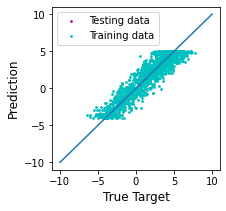

In [265]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y_test, yh, c="m", s=3, label = "Testing data")
ax.scatter(y, yh_train, c="c", s=3, label =  "Training data")
plt.plot(np.linspace(-10,10,10), np.linspace(-10,10,10))
# ax.set_ylim(-2, 2)
# ax.set_xlim(-2, 2)


ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.legend()


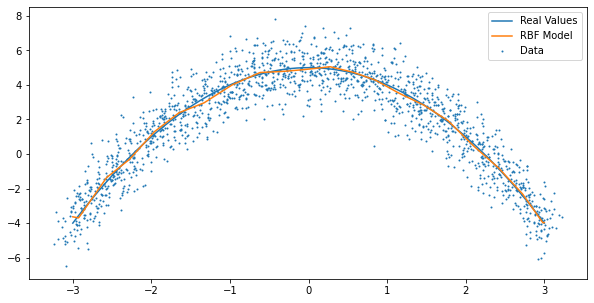

In [266]:
plt.figure(figsize = (10,5))

plt.plot(X_test,y_test, label = "Real Values")
plt.plot(X_test,yh, label = "RBF Model")
plt.scatter(data[:,0], data[:,1], s = 1, label = "Data")
plt.legend()

# Neural net

In [250]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 1)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [251]:
loss_fn = tf.keras.losses.mean_squared_error

In [252]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [253]:
model.fit(X, y, epochs=105)

Epoch 1/105
29/29 [==============================] - 1s 9ms/step - loss: 9.0423 - accuracy: 0.0000e+00
Epoch 2/105
29/29 [==============================] - 0s 10ms/step - loss: 2.3600 - accuracy: 0.0000e+00
Epoch 3/105
29/29 [==============================] - 0s 9ms/step - loss: 1.3604 - accuracy: 0.0000e+00
Epoch 4/105
29/29 [==============================] - 0s 9ms/step - loss: 1.3689 - accuracy: 0.0000e+00
Epoch 5/105
29/29 [==============================] - 0s 9ms/step - loss: 1.4313 - accuracy: 0.0000e+00
Epoch 6/105
29/29 [==============================] - 0s 10ms/step - loss: 1.6603 - accuracy: 0.0000e+00
Epoch 7/105
29/29 [==============================] - 0s 9ms/step - loss: 1.2358 - accuracy: 0.0000e+00
Epoch 8/105
29/29 [==============================] - 0s 10ms/step - loss: 1.2299 - accuracy: 0.0000e+00
Epoch 9/105
29/29 [==============================] - 0s 9ms/step - loss: 1.3019 - accuracy: 0.0000e+00
Epoch 10/105
29/29 [==============================] - 0s 8ms/step - lo

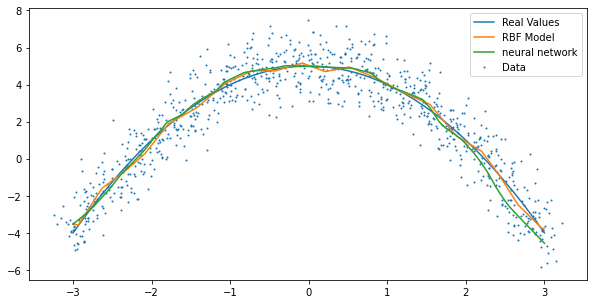

In [254]:
plt.figure(figsize = (10,5))


plt.plot(X_test,y_test, label = "Real Values")
plt.plot(X_test,yh, label = "RBF Model")
plt.scatter(data[:,0], data[:,1], s = 1, label = "Data")
plt.plot(X_test, model(X_test), label = "neural network")

plt.legend()